Desafio 7

In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure

Leitura dos dados

In [7]:
df = pd.read_csv("data.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Descrição dos Dados

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.isna().count()

InvoiceNo      541909
StockCode      541909
Description    541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64

Data Cleaning

In [10]:
df.dropna(inplace=True)

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df[df['InvoiceNo'] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.5,14527.0,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


<Axes: xlabel='UnitPrice'>

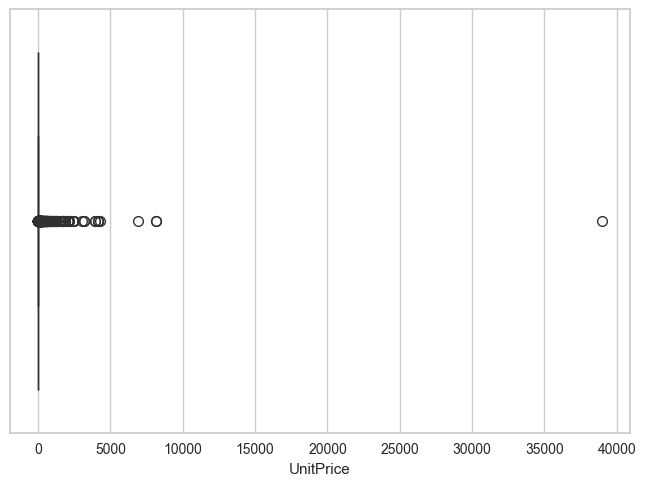

In [14]:
sns.boxplot(x=df['UnitPrice'])

<Axes: xlabel='Quantity'>

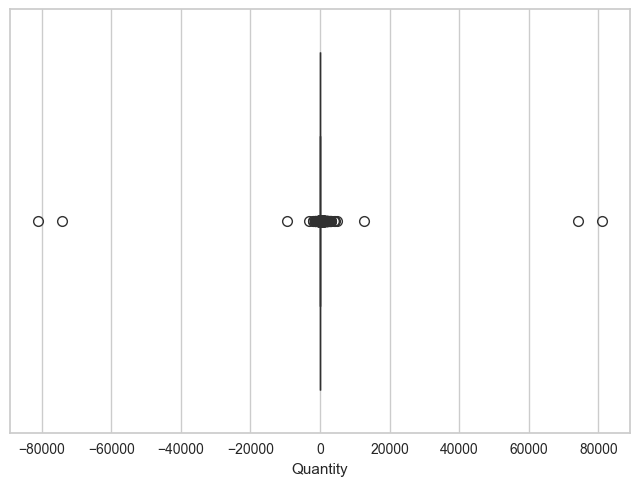

In [15]:
sns.boxplot(x=df['Quantity'])

In [16]:
df_filtered = df.query('Quantity > 0 and Quantity < 100000 & UnitPrice > 0 and UnitPrice < 5000')

In [17]:
df_filtered.describe()

,Quantity,UnitPrice,CustomerID
count,397883.000000,397883.000000,397883.000000
mean,12.988268,3.096030,15294.421606
std,179.331999,17.938818,1713.143317
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,4161.060000,18287.000000


In [18]:
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
df_filtered.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [20]:
df_filtered = df_filtered.astype(
    {'CustomerID': 'object'}
)

In [21]:
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])

In [23]:
df_filtered.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [24]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397883 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397883 non-null  object        
 1   StockCode    397883 non-null  object        
 2   Description  397883 non-null  object        
 3   Quantity     397883 non-null  int64         
 4   InvoiceDate  397883 non-null  datetime64[ns]
 5   UnitPrice    397883 non-null  float64       
 6   CustomerID   397883 non-null  object        
 7   Country      397883 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [25]:
df_filtered.drop_duplicates(inplace=True)

In [26]:
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
df_filtered.duplicated().sum()

0

In [28]:
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Wrangling

In [29]:
df_filtered['TotalPrice'] = df_filtered['Quantity'] * df_filtered['UnitPrice'] 

In [30]:
df_filtered.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
dtype: object

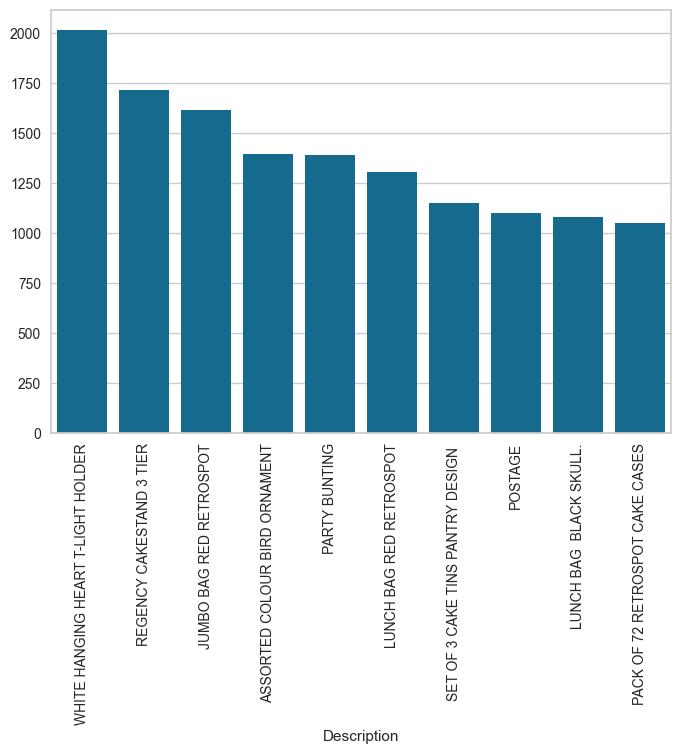

In [31]:
top10_produtos = df_filtered.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(10)

sns.barplot(x=top10_produtos.index, y=top10_produtos.values)
plt.xticks(rotation=90)
plt.show()

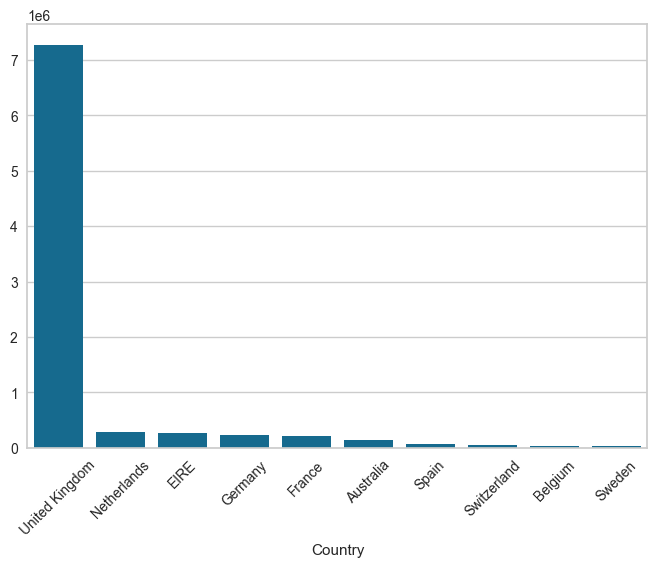

In [32]:
top10_paises = df_filtered.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top10_paises.index, y=top10_paises.values)
plt.xticks(rotation=45)
plt.show()

Decidi usar o k-means como modelo pois a proposta de negócio era poder dividir a base de clientes em diferentes grupos de perfis.

Sobre as colunas utilizadas:
 - CustomerID: Identificação de Cliente, importante para usar no "groupby" da tabela rfm
 - InvoiceDate: Calculo da recência 
 - InvoiceNo: Identificação de compra para realizar a frequência
 - TotalPrice: Para calcular o monetário de cada cliente

Criação do Dataframe do rfm

In [33]:
#Pegar a data máxima de cada cliente
data_max = df_filtered['InvoiceDate'].max()

rfm_df = df_filtered.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_max - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm_df.head()


,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [34]:
rfm_df.columns = ['Recência', 'Frequência', 'Monetário']

In [35]:
rfm_df.describe()

,Recência,Frequência,Monetário
count,4338.000000,4338.000000,4338.000000
mean,91.536422,4.271784,2046.811006
std,100.014169,7.696254,8969.601072
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,306.482500
50%,50.000000,2.000000,668.570000
75%,141.000000,5.000000,1660.597500
max,373.000000,209.000000,280206.020000


Normalização dos dados

In [36]:
scaler = StandardScaler()
rfm_scale = scaler.fit_transform(rfm_df)

pd.DataFrame(rfm_scale, columns=['Recência', 'Frequência', 'Monetário']).head()

,Recência,Frequência,Monetário
0,2.334574,-0.425163,8.377792
1,-0.905340,0.354527,0.252347
2,-0.175360,-0.035318,-0.027827
3,-0.735345,-0.425163,-0.032253
4,2.174578,-0.425163,-0.190935


Descobrindo o melhor "k" com o Elbow Metod

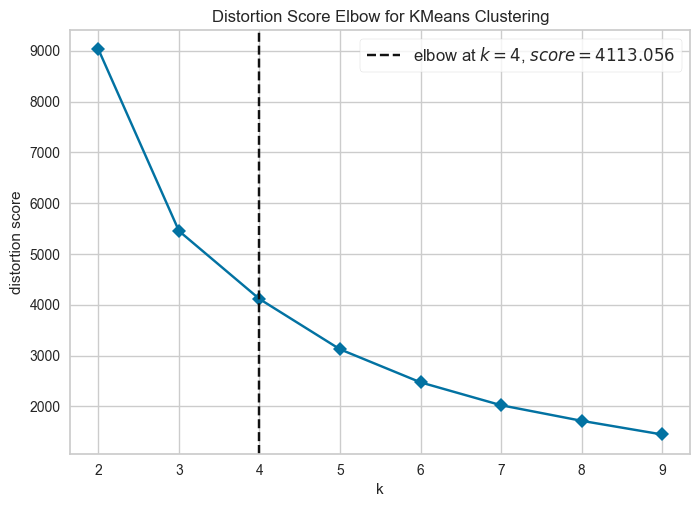

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(rfm_scale)
visualizer.show()

Aplicando o modelo com o melhor k

In [38]:
melhor_k = 4

kmeans = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
rfm_df["Cluster"] = kmeans.fit_predict(rfm_scale)

rfm = rfm_df.reset_index()

rfm.head()

,CustomerID,Recência,Frequência,Monetário,Cluster
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


Pegando o valor médio dos dados agrupados por Cluster

In [39]:
rfm_med = rfm.groupby('Cluster')[['Recência', 'Frequência', 'Monetário']].mean().round(2)

rfm_med.head()

,Recência,Frequência,Monetário
Cluster,,,
0,42.70,3.68,1353.63
1,247.08,1.55,478.85
2,6.38,82.46,126561.59
3,14.50,22.33,12690.50


Últimas análises mostrando o que cada Cluster significa e uma recomendação de ação

Cluster 0 - Recência média, frequência baixa e monetário baixo
- Compram de vez em quando mas não são fiéis ainda
- Solução: Mandar ofertas com base na preferência do cliente e incentivar a gastar mais com pacotes prontos

Cluster 1 - Recência super alta, frequência muito baixa e monetário muito baixo também
- Risco de abandonarem e precisam de atenção
- Solução: Promoções maiores caso voltem a comprar, mais descontos e mandar mensagem para o incentivo

Cluster 2 - Recência muito baixa, frequência super alta e monetário muito alto
- Os clientes mais leais
- Solução: Oferecer programas de lealdade em que o cliente ganha mais benefícios por gastar mais

Cluster 3 - Recência e frequência baixa e monetário médio
- Compram com frequência porém menos que os do Cluster 2
- Solução: Tentar oferecer mais ofertar para encorajar a gastarem mais e se juntarem ao programa de lealdade